# Human Action Recognition

**About Dataset**

Train - contains all the images that are to be used for training your model. In this folder you will find 15 folders namely - 'calling', ’clapping’, ’cycling’, ’dancing’, ‘drinking’, ‘eating’, ‘fighting’, ‘hugging’, ‘laughing’, ‘listening_to_music’, ‘running’, ‘sitting’, ‘sleeping’, texting’, ‘using_laptop’ which contain the images of the respective human activities.

Test - contains 5400 images of Human Activities. For these images you are required to make predictions as the respective class names -'calling', ’clapping’, ’cycling’, ’dancing’, ‘drinking’, ‘eating’, ‘fighting’, ‘hugging’, ‘laughing’, ‘listening_to_music’, ‘running’, ‘sitting’, ‘sleeping’, texting’, ‘using_laptop’.

Testing_set.csv - this is the order of the predictions for each image that is to be submitted on the platform. Make sure the predictions you download are with their image’s filename in the same order as given in this file.

sample_submission: This is a csv file that contains the sample submission for the data sprint.

**Installing the required libraries**

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install tensorflow
%pip install plotly

Importing the required libraries

In [3]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import  Dense

from PIL import Image

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import ResNet50


import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt
import plotly.express as px

Loading the dataset

In [2]:
train_csv = pd.read_csv(r"F:\VS Code\Celebal Technology\Human Action Recognition\Training_set.csv")
test_csv = pd.read_csv(r"F:\VS Code\Celebal Technology\Human Action Recognition\Testing_set.csv")

In [3]:
train_fol = glob.glob("F:/VS Code\Celebal Technology/Human Action Recognition/train/*") 
test_fol = glob.glob("F:/VS Code/Celebal Technology/Human Action Recognition/test/*")

In [4]:
train_csv

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


Checking the dataset is balanced or not

In [5]:
train_csv.label.value_counts()

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [6]:
l = train_csv.label.value_counts()
fig = px.pie(train_csv, values=l.values, names=l.index, title='Distribution of Human Activity')
fig.show()

Data pre-processing

In [4]:
X_train = train_csv['filename']
y_train = train_csv['label']

In [5]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + X_train[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(y_train[i])

In [6]:
inp_shape = (160, 160,3)

In [7]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [8]:
Y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(Y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
label_map = {
    0: "sitting",
    1: "using laptop",
    2: "hugging",
    3: "sleeping",
    4: "drinking",
    5: "clapping",
    6: "dancing",
    7: "cycling",
    8: "calling",
    9: "laughing",
    10: "eating",
    11: "fighting",
    12: "listening_to_music",
    13: "running",
    14: "texting"
}

**Model creation, training and saving**

In [8]:
# create ResNet model            
resnet_model = Sequential()
resnet_model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
resnet_model.add(Dense(15, activation='softmax'))
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 21s 0us/step


In [11]:
history = resnet_model.fit(iii,Y_train, epochs=12)

Epoch 1/12
394/394 [==============================] - 84s 105ms/step - loss: 1.8472 - accuracy: 0.4135
Epoch 2/12
394/394 [==============================] - 40s 103ms/step - loss: 1.3528 - accuracy: 0.5636
Epoch 3/12
394/394 [==============================] - 40s 102ms/step - loss: 1.0739 - accuracy: 0.6547
Epoch 4/12
394/394 [==============================] - 40s 102ms/step - loss: 0.8173 - accuracy: 0.7344
Epoch 5/12
394/394 [==============================] - 40s 102ms/step - loss: 0.5875 - accuracy: 0.8064
Epoch 6/12
394/394 [==============================] - 40s 103ms/step - loss: 0.4084 - accuracy: 0.8663
Epoch 7/12
394/394 [==============================] - 40s 102ms/step - loss: 0.2536 - accuracy: 0.9180
Epoch 8/12
394/394 [==============================] - 40s 102ms/step - loss: 0.1872 - accuracy: 0.9384
Epoch 9/12
394/394 [==============================] - 40s 102ms/step - loss: 0.2106 - accuracy: 0.9304
Epoch 10/12
394/394 [==============================] - 40s 102ms/step - l

**Saving the Model and creating inference pipeline**

In [12]:
resnet_model.save_weights("resnet_model.h5")

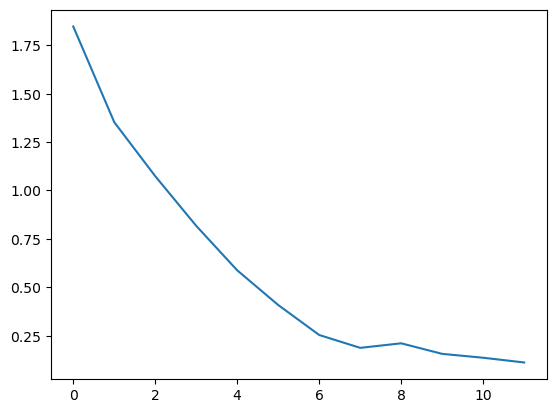

In [14]:
losss = history.history['loss']
plt.plot(losss)

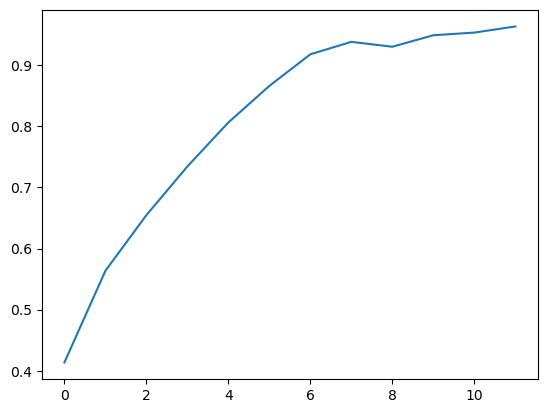

In [15]:
accu = history.history['accuracy']
plt.plot(accu)

In [16]:
def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))
# Function to predict

def test_predict(test_image):
    result = resnet_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)
    return prediction

In [ ]:
folder_path = "Human Action Recognition/test"

# Create an empty dataframe to store the results
predictions_df = pd.DataFrame(columns=["image_name", "prediction"])

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".jpg"): # Adjust the file extension to match your image format
        # Make a prediction for the current image file
        prediction = test_predict(os.path.join(folder_path, file_name))
        
        # Add the prediction result to the dataframe
        predictions_df = pd.concat([predictions_df, pd.DataFrame({"image_name": [file_name], "prediction": [prediction]})], ignore_index=True)

1/1 [==============================] - 2s 2s/step
probability: 50.745391845703125%
Predicted class :  14
1/1 [==============================] - 0s 25ms/step
probability: 46.73101603984833%
Predicted class :  9
1/1 [==============================] - 0s 23ms/step
probability: 38.638874888420105%
Predicted class :  4
1/1 [==============================] - 0s 26ms/step
probability: 59.348517656326294%
Predicted class :  11
1/1 [==============================] - 0s 23ms/step
probability: 99.9998927116394%
Predicted class :  3
1/1 [==============================] - 0s 24ms/step
probability: 63.67567181587219%
Predicted class :  3
1/1 [==============================] - 0s 24ms/step
probability: 99.82335567474365%
Predicted class :  11
1/1 [==============================] - 0s 26ms/step
probability: 52.38606333732605%
Predicted class :  4
1/1 [==============================] - 0s 26ms/step
probability: 46.39507532119751%
Predicted class :  13
1/1 [==============================] - 0s 25ms/step

In [18]:
resnet_csv=predictions_df
        
resnet_csv["prediction"] = resnet_csv["prediction"].map(label_map)
output_filename = "resnet_pred.csv"

# Save the dataframe as a CSV file
resnet_csv.to_csv(os.path.join(output_filename), index=False)